> # User Behaviour Aggregation

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>> ### test connection with database

In [2]:
from scripts.dbConnection import test_connection
test_connection

<function scripts.dbConnection.test_connection()>

>> ### get engine

In [3]:
from scripts.dbConnection import get_engine

engine = get_engine()

>> ### read data

In [4]:
query = "SELECT * FROM xdr_data LIMIT 10;"
data = pd.read_sql(query, con=engine)

In [5]:
data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


>> ### Observe which column have missing values

In [6]:
missing_columns = data.columns[data.isnull().any()].tolist()

In [7]:
missing_columns

['Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B']

>> #### show how many data is missed in %

In [8]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_columns_percentage = missing_percentage[missing_percentage > 0]

In [9]:
missing_columns_percentage

Avg RTT DL (ms)                              50.0
Avg RTT UL (ms)                              50.0
TCP DL Retrans. Vol (Bytes)                  80.0
TCP UL Retrans. Vol (Bytes)                  90.0
HTTP DL (Bytes)                              80.0
HTTP UL (Bytes)                              80.0
Nb of sec with 125000B < Vol DL             100.0
Nb of sec with 1250B < Vol UL < 6250B        80.0
Nb of sec with 31250B < Vol DL < 125000B     80.0
Nb of sec with 37500B < Vol UL              100.0
Nb of sec with 6250B < Vol DL < 31250B       80.0
Nb of sec with 6250B < Vol UL < 37500B       90.0
dtype: float64

>>  ## Handling missing values

>> ### see distribution of the Avg RTT DL (ms)

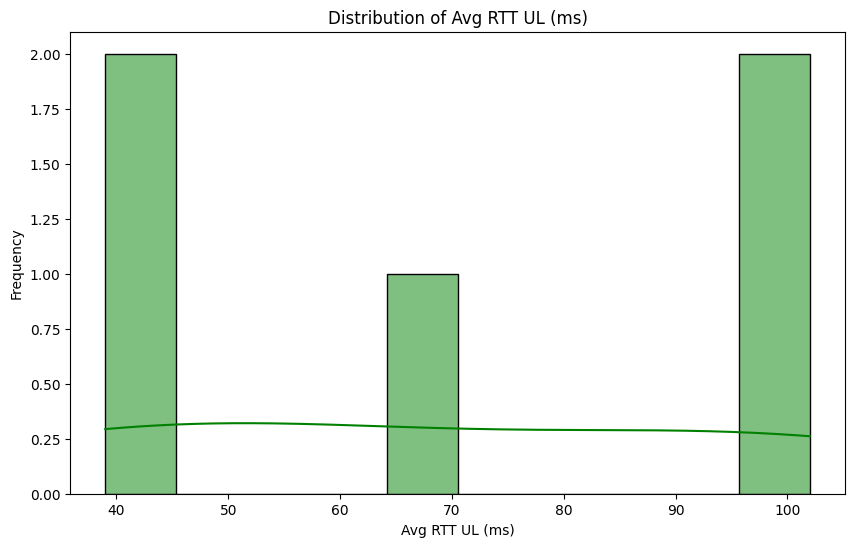

In [10]:
from scripts.histogramPlot import plot_histogram
plot_histogram(data, 'Avg RTT DL (ms)')

>> #### The above distribution shows Multimodal Distribution: This type of distribution occurs when the data has more than one peak, and in this case, there are at least three noticeable peaks at 40 ms, 70 ms, and 100 ms.

>> #### Cluster-Based Imputation: Using clustering (like K-means), we can group similar data points together and then impute missing values based on the cluster's central tendency (e.g., the mean or median). This method helps preserve the natural structure of the data.

In [11]:

from scripts.clusterBasedOfHandlingMissingValue import handle_missing_value_cluster

data = handle_missing_value_cluster(data, 'Avg RTT DL (ms)', n_clusters=3)  # Handling missing values using K-means

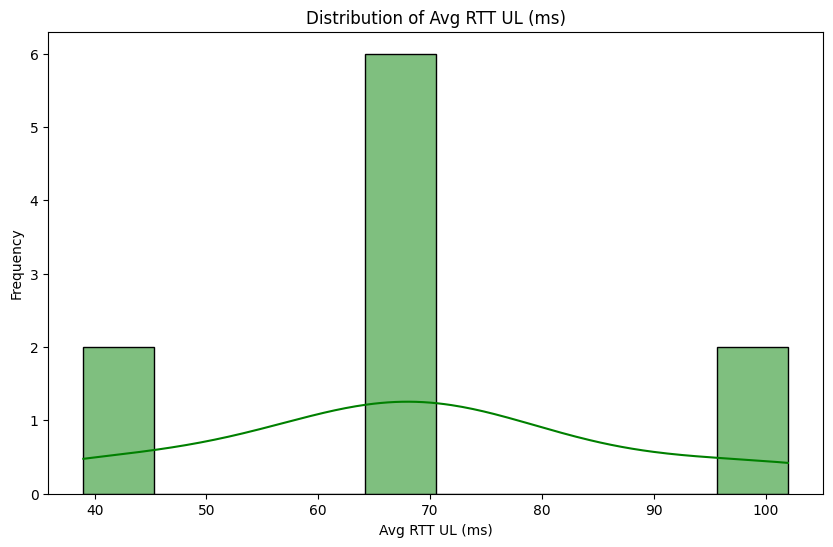

In [12]:
plot_histogram(data, 'Avg RTT DL (ms)')

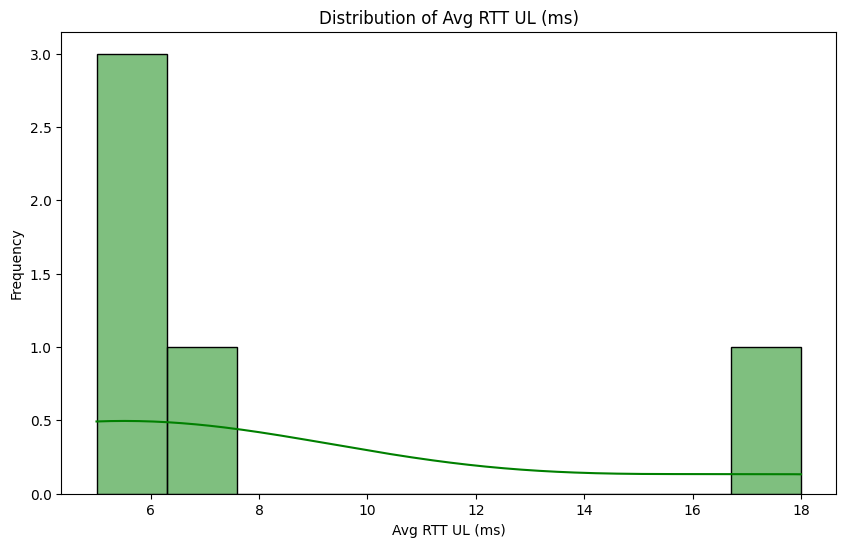

In [14]:
plot_histogram(data, 'Avg RTT UL (ms)')

>> ###  This is still a multimodal distribution but with two primary peaks (around 6-8 ms and 8-10 ms), and a smaller, more isolated peak at 16 ms.

In [16]:
data = handle_missing_value_cluster(data, 'Avg RTT UL (ms)',n_clusters=3)  # Handling missing values using K-means

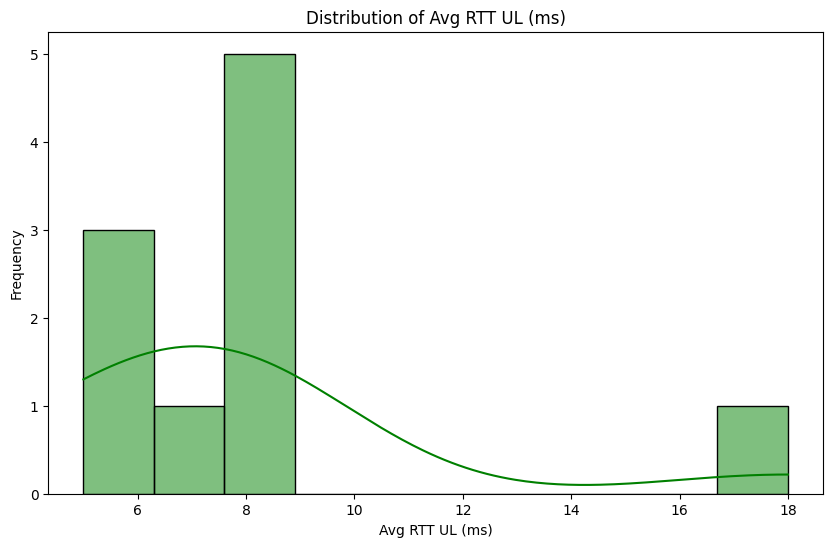

In [17]:
plot_histogram(data, 'Avg RTT UL (ms)')

In [19]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_columns_percentage = missing_percentage[missing_percentage > 0]
missing_columns_percentage

TCP DL Retrans. Vol (Bytes)                  80.0
TCP UL Retrans. Vol (Bytes)                  90.0
HTTP DL (Bytes)                              80.0
HTTP UL (Bytes)                              80.0
Nb of sec with 125000B < Vol DL             100.0
Nb of sec with 1250B < Vol UL < 6250B        80.0
Nb of sec with 31250B < Vol DL < 125000B     80.0
Nb of sec with 37500B < Vol UL              100.0
Nb of sec with 6250B < Vol DL < 31250B       80.0
Nb of sec with 6250B < Vol UL < 37500B       90.0
dtype: float64

In [23]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage >= 80].index

# Drop the columns
data = data.drop(columns=columns_to_drop)

>> ##### check missing colum after we handle missing value

In [26]:
missing_columns = data.columns[data.isnull().any()].tolist()
missing_columns

[]